In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Time series

A time series is a sequence of observations over a certain period. 
A univariate time series consists of the values taken by a single variable at periodic time instances over a period.
A multivariate time series consists of the values taken by multiple variables at the same periodic time instances over a period

#### A time series has 4 components 

Level − It is the mean value around which the series varies.

Trend − It is the increasing or decreasing behavior of a variable with time.

Seasonality − It is the cyclic behavior of time series.

Noise − It is the error in the observations added due to environmental factors.

#### Time Series Modeling Techniques
To capture these components, there are a number of popular time series modelling techniques. 

##### Naïve Methods
These are simple estimation techniques, such as the predicted value is given the value equal to mean of preceding values of the time dependent variable, or previous actual value. These are used for comparison with sophisticated modelling techniques.

##### Auto Regression
Auto regression predicts the values of future time periods as a function of values at previous time periods. Predictions of auto regression may fit the data better than that of naïve methods, but it may not be able to account for seasonality.

##### ARIMA Model
An auto-regressive integrated moving-average models the value of a variable as a linear function of previous values and residual errors at previous time steps of a stationary timeseries. However, the real world data may be non-stationary and have seasonality, thus Seasonal-ARIMA and Fractional-ARIMA were developed. ARIMA works on univariate time series, to handle multiple variables VARIMA was introduced.

##### Exponential Smoothing
It models the value of a variable as an exponential weighted linear function of previous values. This statistical model can handle trend and seasonality as well.

##### LSTM
Long Short-Term Memory model (LSTM) is a recurrent neural network which is used for time series to account for long term dependencies. It can be trained with large amount of data to capture the trends in multi-variate time series.

In [2]:
df = pd.read_csv("AirQualityUCI.csv", sep = ",", decimal = ",")
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
len(df)

9471

In [4]:
df.shape

(9471, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null object
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null object
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null object
RH               9357 non-null object
AH               9357 non-null object
Unnamed: 15      0 non-null float64
Unnamed: 16      0 non-null float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [6]:
df = df.iloc[ : , 0:14]

In [7]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,10-03-2004,19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


In [8]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
dtype: int64

In [9]:
df = df[df['Date'].notnull()]

In [10]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
dtype: int64

In [11]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9
1,10-03-2004,19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6


In [12]:
df['DateTime'] = (df.Date) + ' ' + (df.Time)
print (type(df.DateTime[0]))

<class 'str'>


In [13]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,DateTime
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,10-03-2004 18:00:00
1,10-03-2004,19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,10-03-2004 19:00:00
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,10-03-2004 20:00:00
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,10-03-2004 21:00:00
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,10-03-2004 22:00:00


In [14]:
print (type(df.DateTime[0]))

<class 'str'>


In [15]:
df.DateTime[0]

'10-03-2004 18:00:00'

In [16]:
import datetime

df.DateTime = df.DateTime.apply(lambda x: datetime.datetime.strptime(x, '%d-%m-%Y %H:%M:%S'))

In [17]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,DateTime
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,2004-03-10 18:00:00
1,10-03-2004,19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,2004-03-10 19:00:00
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,2004-03-10 20:00:00
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,2004-03-10 21:00:00
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,2004-03-10 22:00:00


In [18]:
df.index = df.DateTime

In [19]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,DateTime
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,2004-03-10 18:00:00
2004-03-10 19:00:00,10-03-2004,19:00:00,2,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,2004-03-10 19:00:00
2004-03-10 20:00:00,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,2004-03-10 20:00:00
2004-03-10 21:00:00,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,2004-03-10 21:00:00
2004-03-10 22:00:00,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,2004-03-10 22:00:00


In [20]:
cols=[]

cols=df.select_dtypes(include='object').columns

cols

Index(['Date', 'Time', 'CO(GT)', 'C6H6(GT)', 'T', 'RH'], dtype='object')

In [21]:
cols =[ 'CO(GT)', 'C6H6(GT)', 'T', 'RH']

In [22]:
for i in cols:
    df[i] = df[i].astype('float64') 
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,DateTime
DateTime,,,,,,,,,,,,,,,
2004-03-10 18:00:00,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,2004-03-10 18:00:00
2004-03-10 19:00:00,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,2004-03-10 19:00:00
2004-03-10 20:00:00,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,2004-03-10 20:00:00
2004-03-10 21:00:00,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,2004-03-10 21:00:00
2004-03-10 22:00:00,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,2004-03-10 22:00:00


C:\Users\Windows 10\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


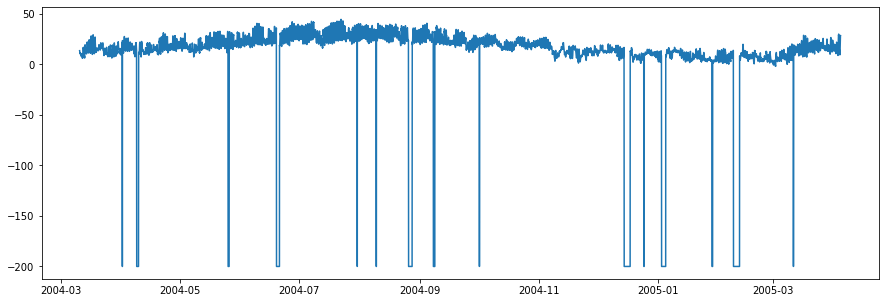

In [23]:
plt.figure(figsize=(15,5))
plt.plot(df['T'])

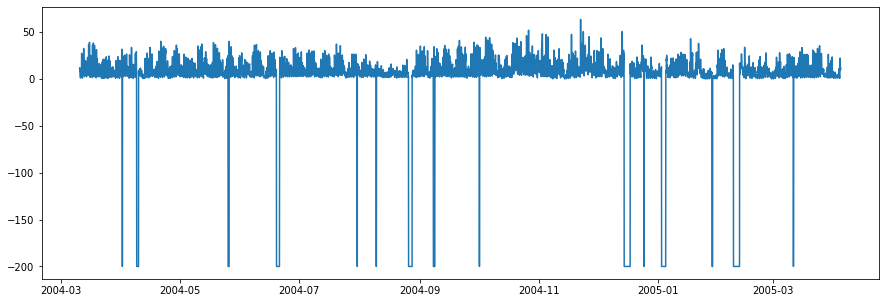

In [24]:
plt.figure(figsize=(15,5))
plt.plot(df['C6H6(GT)']);

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
DateTime         9357 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(12), object(2)
memory usage: 1.1+ MB


{'whiskers': [<matplotlib.lines.Line2D at 0x1eea8df6710>,
 'caps': [<matplotlib.lines.Line2D at 0x1eea8df6da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1eea8df62e8>,
 'medians': [<matplotlib.lines.Line2D at 0x1eea8e02470>,
 'fliers': [<matplotlib.lines.Line2D at 0x1eea8e027b8>,
 'means': []}

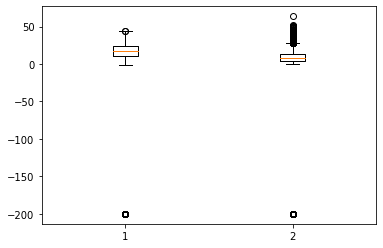

In [26]:
plt.boxplot(df[['T','C6H6(GT)']].values)

### 1st naïve method

In [27]:
print (
   'Mean: ',np.mean(df['T']), 
   '\nStandard Deviation: ',np.std(df['T']),
   '\nMaximum Temperature: ',max(df['T']),
   '\nMinimum Temperature: ',min(df['T'])
)

Mean:  9.778305012290337 
Standard Deviation:  43.20131437514648 
Maximum Temperature:  44.6 
Minimum Temperature:  -200.0


In [28]:
df['T']
df['T_t-1'] = df['T'].shift(1)

In [29]:
df['T_t-1']

DateTime
2004-03-10 18:00:00     NaN
2004-03-10 19:00:00    13.6
2004-03-10 20:00:00    13.3
2004-03-10 21:00:00    11.9
2004-03-10 22:00:00    11.0
2004-03-10 23:00:00    11.2
2004-03-11 00:00:00    11.2
2004-03-11 01:00:00    11.3
2004-03-11 02:00:00    10.7
2004-03-11 03:00:00    10.7
2004-03-11 04:00:00    10.3
2004-03-11 05:00:00    10.1
2004-03-11 06:00:00    11.0
2004-03-11 07:00:00    10.5
2004-03-11 08:00:00    10.2
2004-03-11 09:00:00    10.8
2004-03-11 10:00:00    10.5
2004-03-11 11:00:00    10.8
2004-03-11 12:00:00    10.5
2004-03-11 13:00:00     9.5
2004-03-11 14:00:00     8.3
2004-03-11 15:00:00     8.0
2004-03-11 16:00:00     8.3
2004-03-11 17:00:00     9.7
2004-03-11 18:00:00     9.8
2004-03-11 19:00:00    10.3
2004-03-11 20:00:00     9.7
2004-03-11 21:00:00     9.6
2004-03-11 22:00:00     9.1
2004-03-11 23:00:00     8.2
                       ... 
2005-04-03 09:00:00    13.5
2005-04-03 10:00:00    17.8
2005-04-03 11:00:00    21.1
2005-04-03 12:00:00    24.0
2005-04-03 

In [30]:
df_naive = df[['T','T_t-1']][1:]

In [31]:
df_naive.head()

,T,T_t-1
DateTime,,
2004-03-10 19:00:00,13.3,13.6
2004-03-10 20:00:00,11.9,13.3
2004-03-10 21:00:00,11.0,11.9
2004-03-10 22:00:00,11.2,11.0
2004-03-10 23:00:00,11.2,11.2


In [32]:
df_naive.columns

Index(['T', 'T_t-1'], dtype='object')

In [33]:
from sklearn import metrics
from math import sqrt

test = df_naive['T']
prediction = df_naive['T_t-1']
error = sqrt(metrics.mean_squared_error(test,prediction))
print ('RMSE for Naive Method 1: ', error)

RMSE for Naive Method 1:  12.901140576492974


### 2nd naive method

In [34]:
df['T_rm'] = df['T'].rolling(3).mean().shift(1)
df_naive = df[['T','T_rm']].dropna()

In [35]:
df['T_rm']

DateTime
2004-03-10 18:00:00          NaN
2004-03-10 19:00:00          NaN
2004-03-10 20:00:00          NaN
2004-03-10 21:00:00    12.933333
2004-03-10 22:00:00    12.066667
2004-03-10 23:00:00    11.366667
2004-03-11 00:00:00    11.133333
2004-03-11 01:00:00    11.233333
2004-03-11 02:00:00    11.066667
2004-03-11 03:00:00    10.900000
2004-03-11 04:00:00    10.566667
2004-03-11 05:00:00    10.366667
2004-03-11 06:00:00    10.466667
2004-03-11 07:00:00    10.533333
2004-03-11 08:00:00    10.566667
2004-03-11 09:00:00    10.500000
2004-03-11 10:00:00    10.500000
2004-03-11 11:00:00    10.700000
2004-03-11 12:00:00    10.600000
2004-03-11 13:00:00    10.266667
2004-03-11 14:00:00     9.433333
2004-03-11 15:00:00     8.600000
2004-03-11 16:00:00     8.200000
2004-03-11 17:00:00     8.666667
2004-03-11 18:00:00     9.266667
2004-03-11 19:00:00     9.933333
2004-03-11 20:00:00     9.933333
2004-03-11 21:00:00     9.866667
2004-03-11 22:00:00     9.466667
2004-03-11 23:00:00     8.966667
 

In [36]:
df_naive.head()

,T,T_rm
DateTime,,
2004-03-10 21:00:00,11.0,12.933333
2004-03-10 22:00:00,11.2,12.066667
2004-03-10 23:00:00,11.2,11.366667
2004-03-11 00:00:00,11.3,11.133333
2004-03-11 01:00:00,10.7,11.233333


In [37]:
true = df_naive['T']
prediction = df_naive['T_rm']
error = sqrt(metrics.mean_squared_error(true,prediction))
print ('RMSE for Naive Method 2: ', error)

RMSE for Naive Method 2:  14.957633272839242


### Time Series - Auto Regression

#### ACP

In [38]:
split = len(df) - int(0.2*len(df))
train, test = df['T'][0:split], df['T'][split:]

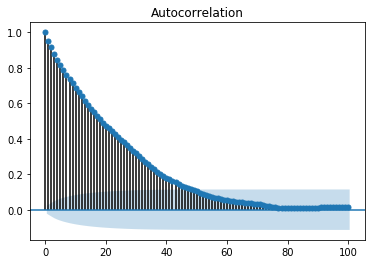

In [39]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(train, lags = 100)
plt.show()

#### PACP

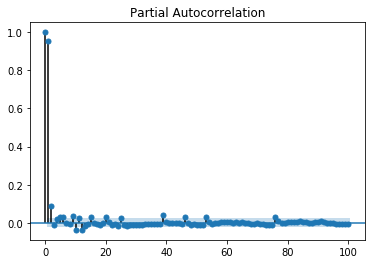

In [40]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(train, lags = 100)
plt.show()

#### Augmented Dickey-Fuller (ADF) test

In [41]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.406056
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


p-value greater than 0.05 : time series is non-stationary.

p-value less than / equal to 0.05 / ADF Statistic less than critical values suggest the time series is stationary.

Hence, the time series we are dealing with is already stationary. 
In case of stationary time series, we set the ‘d’ parameter as 0.

#### Hurst exponent

In [42]:
# ! pip install hurst

In [43]:
import hurst

H, c,data = hurst.compute_Hc(train)
print("H = {:.4f} \nc = {:.4f}".format(H,c))

H = 0.1660 
c = 5.0740


if H<0.5, shows anti-persistent behavior

if H>0.5, shows persistent behavior or a trending series.

if H=0.5, shows random walk/Brownian motion. 

Hence, value H<0.5, confirming that our series is stationary.

#### ARIMA Model

In [44]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train.values, order=(5, 0, 2))
model_fit = model.fit(disp=False)

In [45]:
predictions = model_fit.predict(len(test))
test_ = pd.DataFrame(test)
test_['predictions'] = predictions[0:1871]

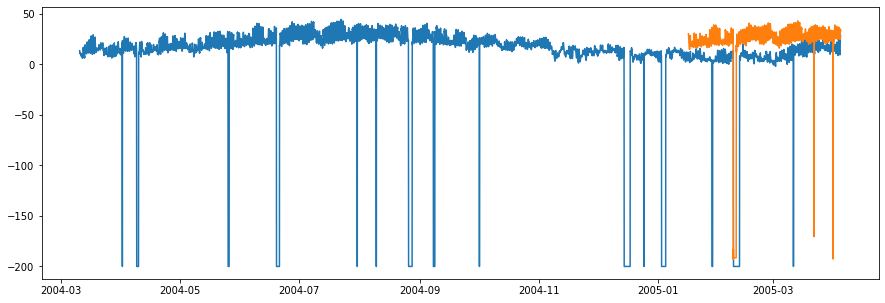

In [46]:
plt.figure(figsize=(15,5))
plt.plot(df['T'])
plt.plot(test_.predictions)
plt.show()

In [47]:
error = sqrt(metrics.mean_squared_error(test.values,predictions[0:1871]))
print ('Test RMSE for ARIMA: ', error)

Test RMSE for ARIMA:  43.212465031736734


### Time Series - Exponential Smoothing

exponential smoothing can also be used for time series with trend and seasonality.

#### Triple Exponential Smoothing
Triple Exponential Smoothing (TES) or Holt's Winter method, applies exponential smoothing three times - level smoothing lt, trend smoothing bt, and seasonal smoothing St, with α, β∗ and γ as smoothing parameters with ‘m’ as the frequency of the seasonality, i.e. the number of seasons in a year.

TES has two categories 

1.Holt-Winter's Additive Method − When the seasonality is additive in nature.



2.Holt-Winter’s Multiplicative Method − When the seasonality is multiplicative in nature.

For non-seasonal time series, we only have trend smoothing and level smoothing, which is called Holt’s Linear Trend Method.

In [48]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train.values)
model_fit = model.fit()

In [49]:
predictions_ = model_fit.predict(len(test))

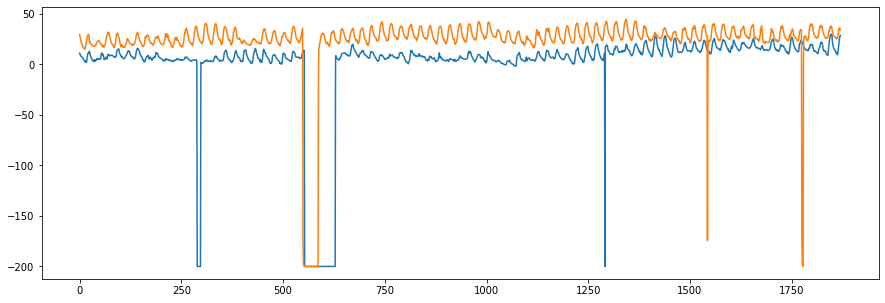

In [50]:
plt.figure(figsize=(15,5))
plt.plot(test.values)
plt.plot(predictions_[1:1871]);

### Time Series - Walk Forward Validation

In [51]:
prediction = []
data = train.values
for t in test.values:
    model = (ExponentialSmoothing(data).fit())
    y = model.predict()
    prediction.append(y[0])
    data = np.append(data, t)

C:\Users\Windows 10\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\Windows 10\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


In [52]:
test_ = pd.DataFrame(test)
test_['predictionswf'] = prediction

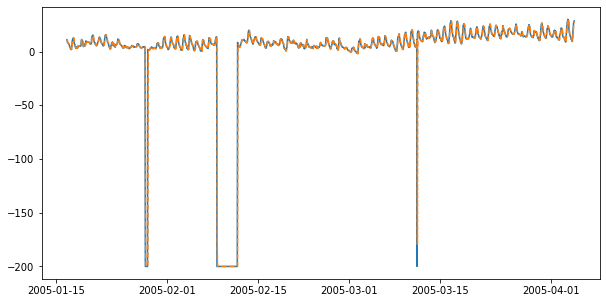

In [53]:
plt.figure(figsize=(10,5))
plt.plot(test_['T'])
plt.plot(test_.predictionswf, '--')
plt.show();

In [54]:
error = sqrt(metrics.mean_squared_error(test.values,prediction))
print ('Test RMSE for Triple Exponential Smoothing with Walk-Forward Validation: ', error)

Test RMSE for Triple Exponential Smoothing with Walk-Forward Validation:  11.78753214588814


### Time Series - LSTM Model

###### Refer my another Repositories:
  1. https://github.com/mugeshraja06/Household-Power-Consumption-Prediction-_RNN---LSTM
  2. https://github.com/mugeshraja06/Google-Stock-prediction-_-RNN--LSTM